# Imports

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from sklearn.decomposition import PCA, NMF, TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Faces

## Leitura dos dados

In [42]:
mat_contents = scipy.io.loadmat('allFaces.mat')

faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
n_faces = np.ndarray.flatten(mat_contents['nfaces'])

In [43]:
m

168

In [44]:
n

192

## Informações da Base de dados

- 38 pessoas
- 2410 imagens
- Média de 63 imagens por pessoa
- 32256 pixels por imagem
- Imagens em preto e branco

In [45]:
faces

array([[80, 94, 59, ...,  3,  4,  4],
       [81, 87, 67, ...,  4,  4,  3],
       [80, 88, 66, ...,  2,  4,  4],
       ...,
       [14,  7,  6, ...,  0,  1,  1],
       [14,  9,  6, ...,  1,  1,  0],
       [11,  8,  7, ...,  1,  1,  2]], dtype=uint8)

In [46]:
n_faces

array([64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63, 63,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64], dtype=uint8)

## Exemplo de cada pessoa

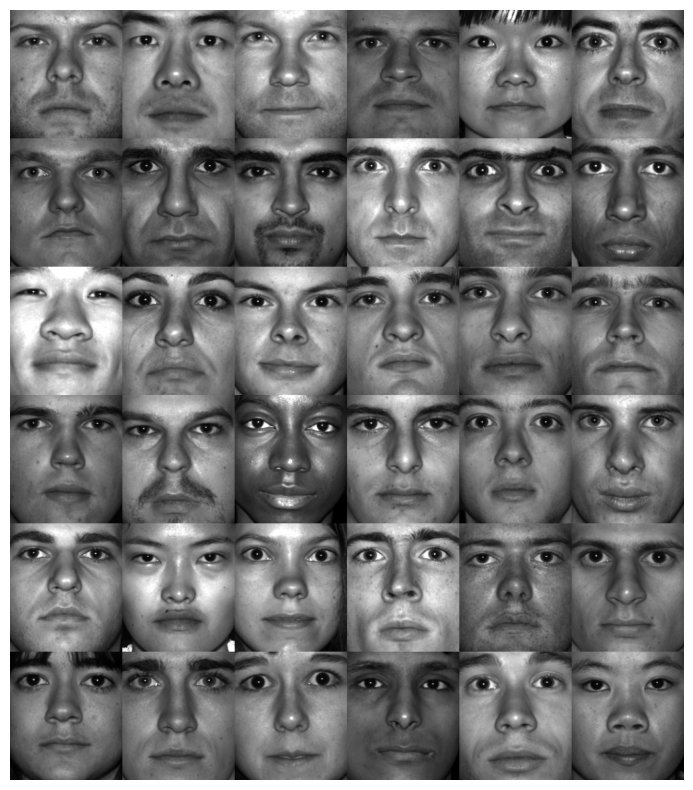

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]

all_persons = np.zeros((n * 6, m * 6))
count = 0

for j in range(6):
    for k in range(6):
        all_persons[j * n : (j + 1) * n, k * m : (k + 1) * m] = np.reshape(faces[:, np.sum(n_faces[:count])], (m, n)).T
        count += 1
        
img = plt.imshow(all_persons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

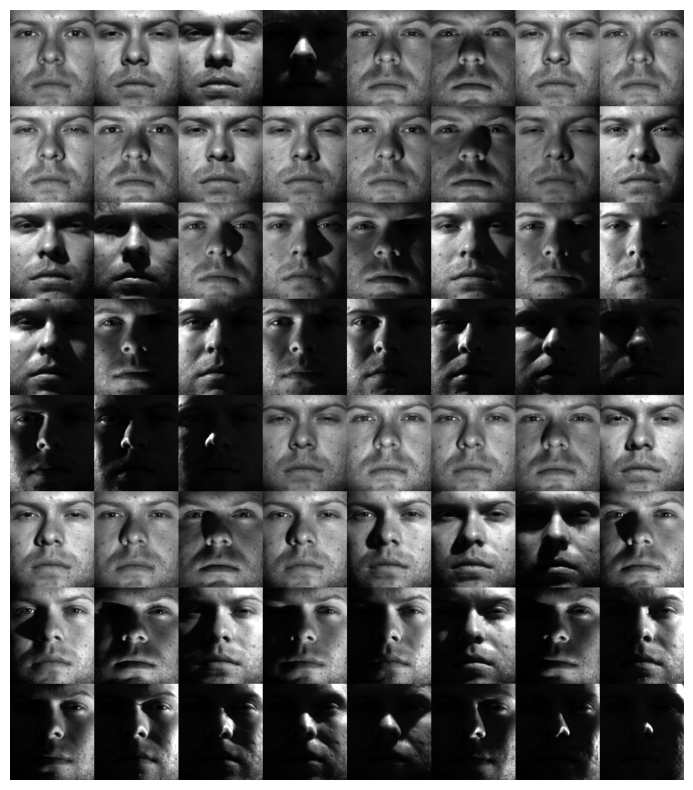

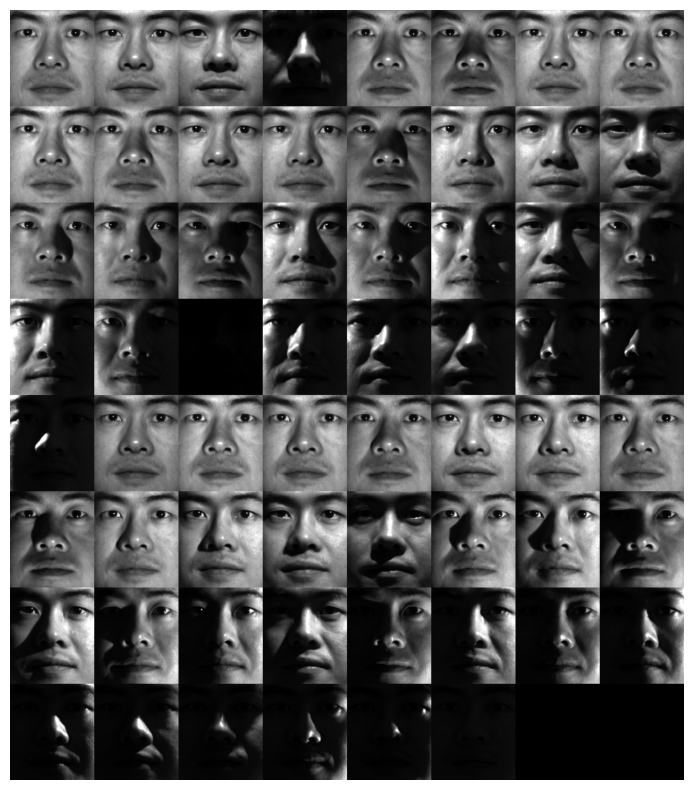

In [48]:
for person in range(2):
    subset = faces[:, sum(n_faces[:person]) : sum(n_faces[:person + 1])]
    allFaces = np.zeros((n * 8,m * 8))
    
    count = 0
    
    for j in range(8):
        for k in range(8):
            if count < n_faces[person]:
                allFaces[j * n: (j + 1) * n, k * m:(k + 1) * m] = np.reshape(subset[:, count], (m, n)).T
                count += 1
                
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

### Seleção de imagens

In [49]:
selected_faces = faces[:, 0:15]
selected_faces = np.delete(selected_faces, 3, axis=1)

for person in range(len(n_faces)):
    selected_faces = np.append(selected_faces, faces[:, sum(n_faces[:person]) : sum(n_faces[:person]) + 15], axis=1)
    selected_faces = np.delete(selected_faces, selected_faces.shape[1] - 13, axis=1)

print(selected_faces.shape)

(32256, 546)


## PCA (SVD) 

In [50]:
pca = PCA(n_components=49)

In [51]:
V = pca.fit_transform(selected_faces.T).T
U = pca.components_.T

In [52]:
np.shape(U)

(32256, 49)

In [53]:
np.shape(V)

(49, 546)

In [54]:
U

array([[-0.00387467,  0.00050177,  0.00660086, ..., -0.00341249,
         0.00968305, -0.00739304],
       [-0.00387913,  0.00052423,  0.00657137, ..., -0.00404617,
         0.00918096, -0.00551045],
       [-0.00386173,  0.00061335,  0.00661618, ..., -0.003763  ,
         0.00846927, -0.00475961],
       ...,
       [-0.00146046, -0.00309173, -0.00609112, ...,  0.00320233,
         0.004794  , -0.00575065],
       [-0.00152474, -0.00328677, -0.00629951, ...,  0.0053594 ,
         0.00635018, -0.00663595],
       [-0.00155292, -0.00331961, -0.00635258, ...,  0.00666498,
         0.00680769, -0.00685745]])

In [55]:
V

array([[-3.85469578e+03, -4.57031354e+03, -3.09785238e+03, ...,
         2.28140275e+03,  7.38299522e+03,  4.25440720e+03],
       [ 7.04460830e+02,  3.66882699e+03,  6.96851426e+03, ...,
        -1.93839497e+03, -3.65639357e+03, -7.94009088e+02],
       [-2.30759549e+03, -2.23237333e+03, -2.23917721e+03, ...,
         2.72559837e+03,  1.74415147e+03,  3.12729571e+03],
       ...,
       [-2.40502238e-01, -2.71088490e+02, -3.12367813e+02, ...,
         8.88181558e+00, -3.18631823e+02,  2.09044299e+01],
       [-6.27631816e+00, -2.31859923e+02, -4.83568196e+02, ...,
        -1.53445761e+01, -2.73768462e+02,  7.34393417e+01],
       [ 6.18577378e+01,  2.97764001e+02,  4.56383679e+02, ...,
        -4.24190813e+02, -1.86499652e+02, -3.91685231e+02]])

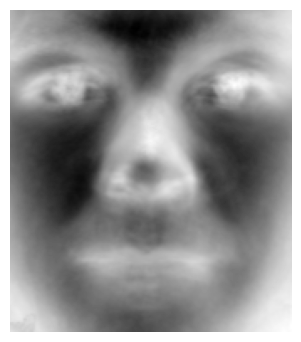

In [56]:
plt.rcParams['figure.figsize'] = [8, 8]

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_u1 = ax1.imshow(np.reshape(U[:, 0], (m, n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

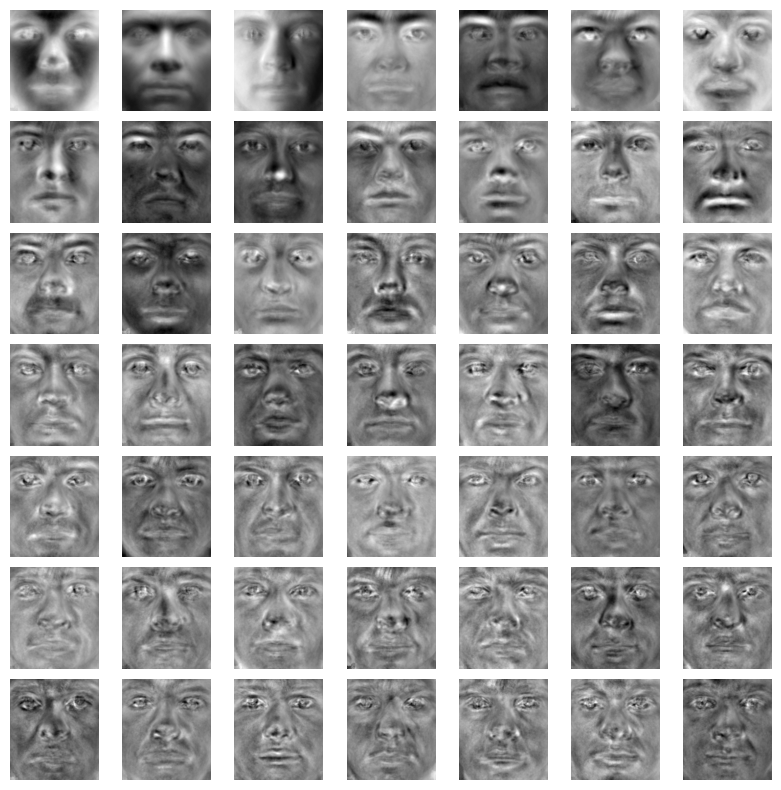

In [57]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(U[:, i], (m, n)).T, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### Reconstrução

In [58]:
A_approx = pca.inverse_transform(V.T).T
print(np.linalg.norm(A_approx - selected_faces))

40457.324491843254


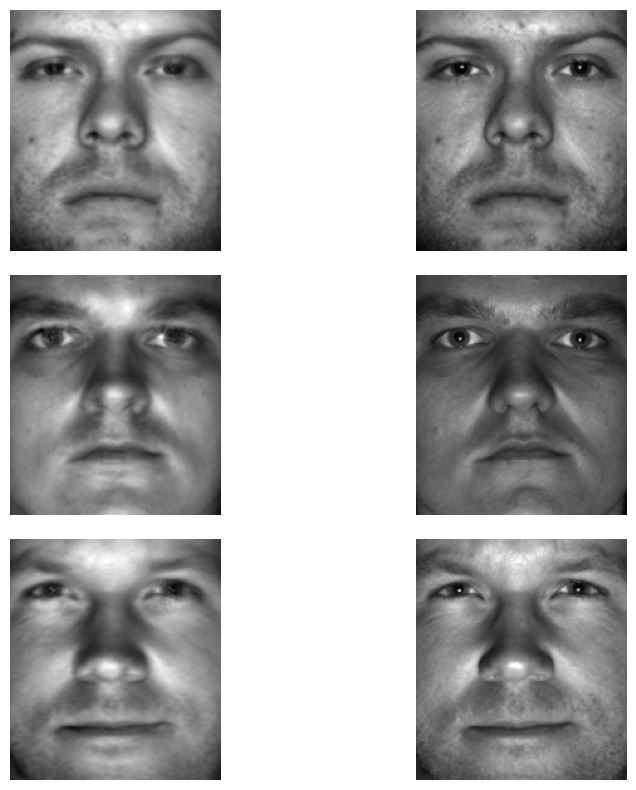

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
images = [A_approx[:, 0], selected_faces[:, 0], A_approx[:, 101], selected_faces[:, 101], A_approx[:, 45], selected_faces[:, 45]]

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(images[i], (m, n)).T, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

## NMF

In [60]:
nmf = NMF(n_components=49)

In [61]:
H = nmf.fit_transform(selected_faces.T).T
W = nmf.components_.T

In [62]:
np.shape(W)

(32256, 49)

In [63]:
np.shape(H)

(49, 546)

In [64]:
W

array([[  3.8871538 ,   1.53528668, 216.80351109, ...,  46.5794892 ,
         56.70074796,  59.17825078],
       [  3.96167675,   0.45010532, 215.13049753, ...,  20.03934785,
         55.00322104,  59.99200487],
       [  4.14854691,   0.        , 212.65982695, ...,  23.10639119,
         55.78370301,  60.28610391],
       ...,
       [  0.        , 109.55001073,   0.        , ...,   0.        ,
         14.58762432,  18.71052463],
       [  0.        , 110.27192941,   0.        , ...,   0.        ,
         16.82623754,  18.90673522],
       [  0.        , 109.47448319,   0.        , ...,   0.        ,
         18.64461248,  18.94053431]])

In [65]:
H[0, :]

array([0.79268726, 0.83739732, 0.84097901, 0.48688311, 0.22980563,
       0.90892036, 0.79885546, 1.09265703, 0.81245954, 1.24136861,
       1.27673223, 0.98713159, 0.17771992, 0.91719968, 0.79268726,
       0.83739732, 0.        , 0.48688311, 0.22980563, 0.90892036,
       0.79885546, 1.09265703, 0.81245954, 1.24136861, 1.27673223,
       0.98713159, 0.17771992, 0.91719968, 0.66854902, 0.69471211,
       0.        , 0.63701446, 0.48247396, 0.79486152, 0.86137616,
       0.        , 0.91988493, 1.01526674, 0.        , 0.64155416,
       1.34051364, 1.27410633, 0.92532895, 1.13662895, 0.        ,
       0.        , 0.        , 1.02874387, 0.        , 1.24191636,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30416612, 0.39612583, 0.        , 0.51239764,
       0.37511965, 0.56654902, 0.51686472, 0.63496727, 0.45793424,
       0.61752767, 0.64571831, 0.52206318, 0.37015997, 0.47025367,
       1.32439193, 0.82003554, 0.02037839, 0.        , 0.     

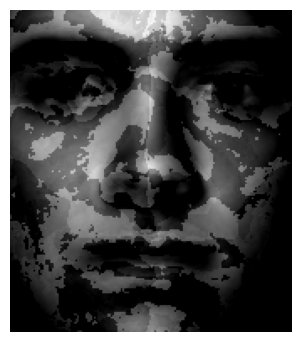

In [66]:
plt.rcParams['figure.figsize'] = [8, 8]

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_u1 = ax1.imshow(np.reshape(W[:, 0], (m, n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

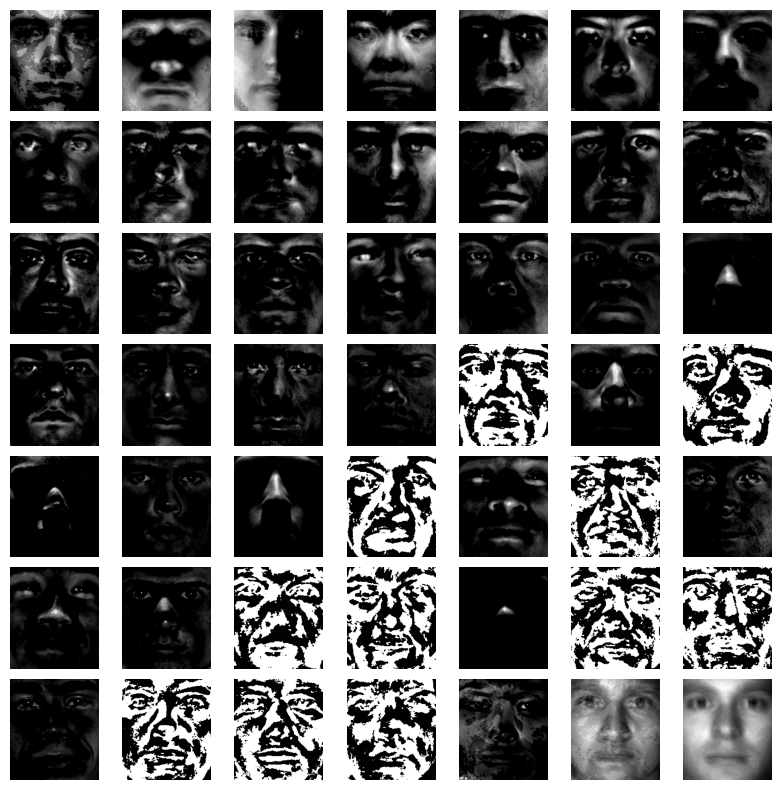

In [67]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(W[:, i], (m, n)).T, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### Reconstrução

In [68]:
A = W @ H

print(np.linalg.norm(A - selected_faces))
print(np.shape(A))
print(np.shape(selected_faces))

112021.53869870532
(32256, 546)
(32256, 546)


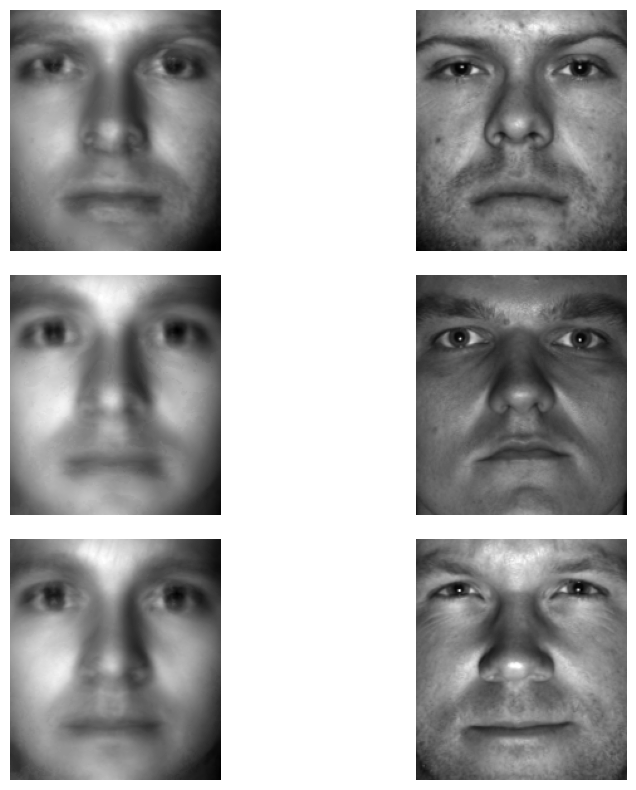

In [69]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
images = [A[:, 0], selected_faces[:, 0], A[:, 101], selected_faces[:, 101], A[:, 45], selected_faces[:, 45]]

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(images[i], (m, n)).T, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Texto

In [70]:
data = pd.read_csv('news_tokens.csv')

data.head()

headline   
0                         funniest tweet parent week  \
1               golden globe return nbc januari year   
2     biden say forc would defend taiwan china invad   
3  beauti sad time ukrainian cultur festiv take d...   
4                     jame cameron say studio releas   

                                   short_description   
0  accident put toothpast toddler toothbrush scre...  \
1  past month hollywood effect boycot globe repor...   
2                 presid issu vow tension china rise   
3  annual celebr took differ feel russia invas dr...   
4  avatar director said aspect movi still competi...   

                                                 mix       category  
0  accident put toothpast toddler toothbrush scre...      PARENTING  
1  past month hollywood effect boycot globe repor...  ENTERTAINMENT  
2  presid issu vow tension china rise biden say f...       POLITICS  
3  annual celebr took differ feel russia invas dr...       POLITICS  
4  avatar director said aspect movi still competi...  ENTERTAINMENT

In [71]:
data = data.drop(columns = ['headline', 'short_description'])
data.tail()

mix       category
115292  year peopl greeter longer welcom walmart custo...       BUSINESS
115293  decad crise assail develop countri indonesia a...       BUSINESS
115294  analyst adob combin histor purchas upgrad data...       BUSINESS
115295  represent collect diaspora alway thwart need c...  ENTERTAINMENT
115296  soni pictur releas girl dragon tattoo censor b...  ENTERTAINMENT

In [72]:
count_vectorizer = TfidfVectorizer(max_features=50)
count_vectorizer.fit(data['mix'])

frequency_matrix = count_vectorizer.transform(data['mix'])

print(frequency_matrix.shape)

(115297, 50)


In [73]:
count_vectorizer.vocabulary_

{'like': 17,
 'week': 45,
 'year': 49,
 'presid': 29,
 'say': 32,
 'would': 48,
 'day': 5,
 'time': 39,
 'take': 36,
 'said': 31,
 'help': 13,
 'show': 34,
 'new': 25,
 'work': 46,
 'could': 4,
 'find': 8,
 'make': 21,
 'state': 35,
 'best': 2,
 'back': 1,
 'use': 41,
 'trump': 40,
 'way': 44,
 'first': 9,
 'life': 16,
 'right': 30,
 'peopl': 27,
 'even': 7,
 'see': 33,
 'mani': 22,
 'look': 19,
 'may': 23,
 'love': 20,
 'donald': 6,
 'world': 47,
 'one': 26,
 'thing': 37,
 'think': 38,
 'come': 3,
 'get': 10,
 'video': 42,
 'need': 24,
 'know': 15,
 'health': 12,
 'american': 0,
 'live': 18,
 'good': 11,
 'photo': 28,
 'kid': 14,
 'want': 43}

In [74]:
feature_names = count_vectorizer.get_feature_names_out()
feature_names

array(['american', 'back', 'best', 'come', 'could', 'day', 'donald',
       'even', 'find', 'first', 'get', 'good', 'health', 'help', 'kid',
       'know', 'life', 'like', 'live', 'look', 'love', 'make', 'mani',
       'may', 'need', 'new', 'one', 'peopl', 'photo', 'presid', 'right',
       'said', 'say', 'see', 'show', 'state', 'take', 'thing', 'think',
       'time', 'trump', 'use', 'video', 'want', 'way', 'week', 'work',
       'world', 'would', 'year'], dtype=object)

## SVD

In [75]:
svd = TruncatedSVD(n_components=10)

In [76]:
Ut = svd.fit_transform(frequency_matrix.T)
Vt = svd.components_

In [77]:
np.shape(Ut)

(50, 10)

In [78]:
np.shape(Vt)

(10, 115297)

In [79]:
Ut

array([[ 4.80589693e+00, -1.76096895e+00,  4.17886827e-01,
        -2.02188539e+00,  4.12429332e-02, -2.61763751e-01,
         3.04854064e-01,  2.01513435e+00, -1.42354986e-01,
        -1.47498443e+00],
       [ 4.88171787e+00, -2.64160222e+00, -5.45316421e-01,
        -1.22780303e+00, -4.89649396e-01, -8.88709519e-01,
         6.80667946e-01,  1.63797436e+00, -2.59889921e-02,
        -1.97425854e+00],
       [ 4.87685679e+00, -6.25598521e+00, -2.82902732e+00,
        -6.42560395e-01, -5.16393799e-01,  8.19270882e-01,
        -8.63147142e-01,  2.01463633e-01, -2.37792613e+00,
        -1.65069710e+00],
       [ 5.31894195e+00, -4.34678136e+00,  5.55644987e-02,
        -2.57429470e+00, -1.96667295e-01, -1.34925233e-01,
         1.88019137e+00,  2.36221100e+00,  1.70706015e+00,
        -4.71782557e-01],
       [ 6.57452239e+00, -3.23793609e+00,  1.29512933e-01,
        -3.75083219e+00,  6.57807322e-01, -1.19128817e+00,
         5.98418600e-02,  3.37739471e+00, -1.32000404e+00,
        -6.

In [80]:
Vt

array([[ 1.85098360e-03,  1.55330653e-03,  3.07105599e-03, ...,
         0.00000000e+00,  1.19074416e-03,  0.00000000e+00],
       [-2.09590347e-03, -2.10518997e-03,  3.76660676e-04, ...,
         0.00000000e+00, -1.04377051e-03,  0.00000000e+00],
       [-1.00958042e-03,  1.56386687e-03, -1.93787423e-04, ...,
        -0.00000000e+00,  9.38893552e-05, -0.00000000e+00],
       ...,
       [ 2.58739873e-04,  9.70534687e-03, -3.08133992e-04, ...,
        -0.00000000e+00,  5.33536335e-04, -0.00000000e+00],
       [ 9.68904645e-03,  6.73050534e-04, -1.49416600e-03, ...,
         0.00000000e+00, -4.51769709e-04,  0.00000000e+00],
       [ 3.20137410e-03, -1.06211842e-02, -3.66640416e-04, ...,
        -0.00000000e+00, -4.55392667e-04, -0.00000000e+00]])

In [81]:
def plot_word_frequencies(vector, ax, title):
    word_counts = vector.flatten()
    sorted_indices = np.argsort(word_counts)[::-1]
    sorted_feature_names = feature_names[sorted_indices]
    sorted_word_counts = word_counts[sorted_indices]
    ax.bar(range(len(sorted_word_counts)), sorted_word_counts, align='center')
    ax.set_xticks(range(len(sorted_feature_names)))
    ax.set_xticklabels(sorted_feature_names, rotation=90)
    ax.set_xlabel('Palavras')
    ax.set_ylabel('Frequência')
    ax.set_title(title)

(50,)


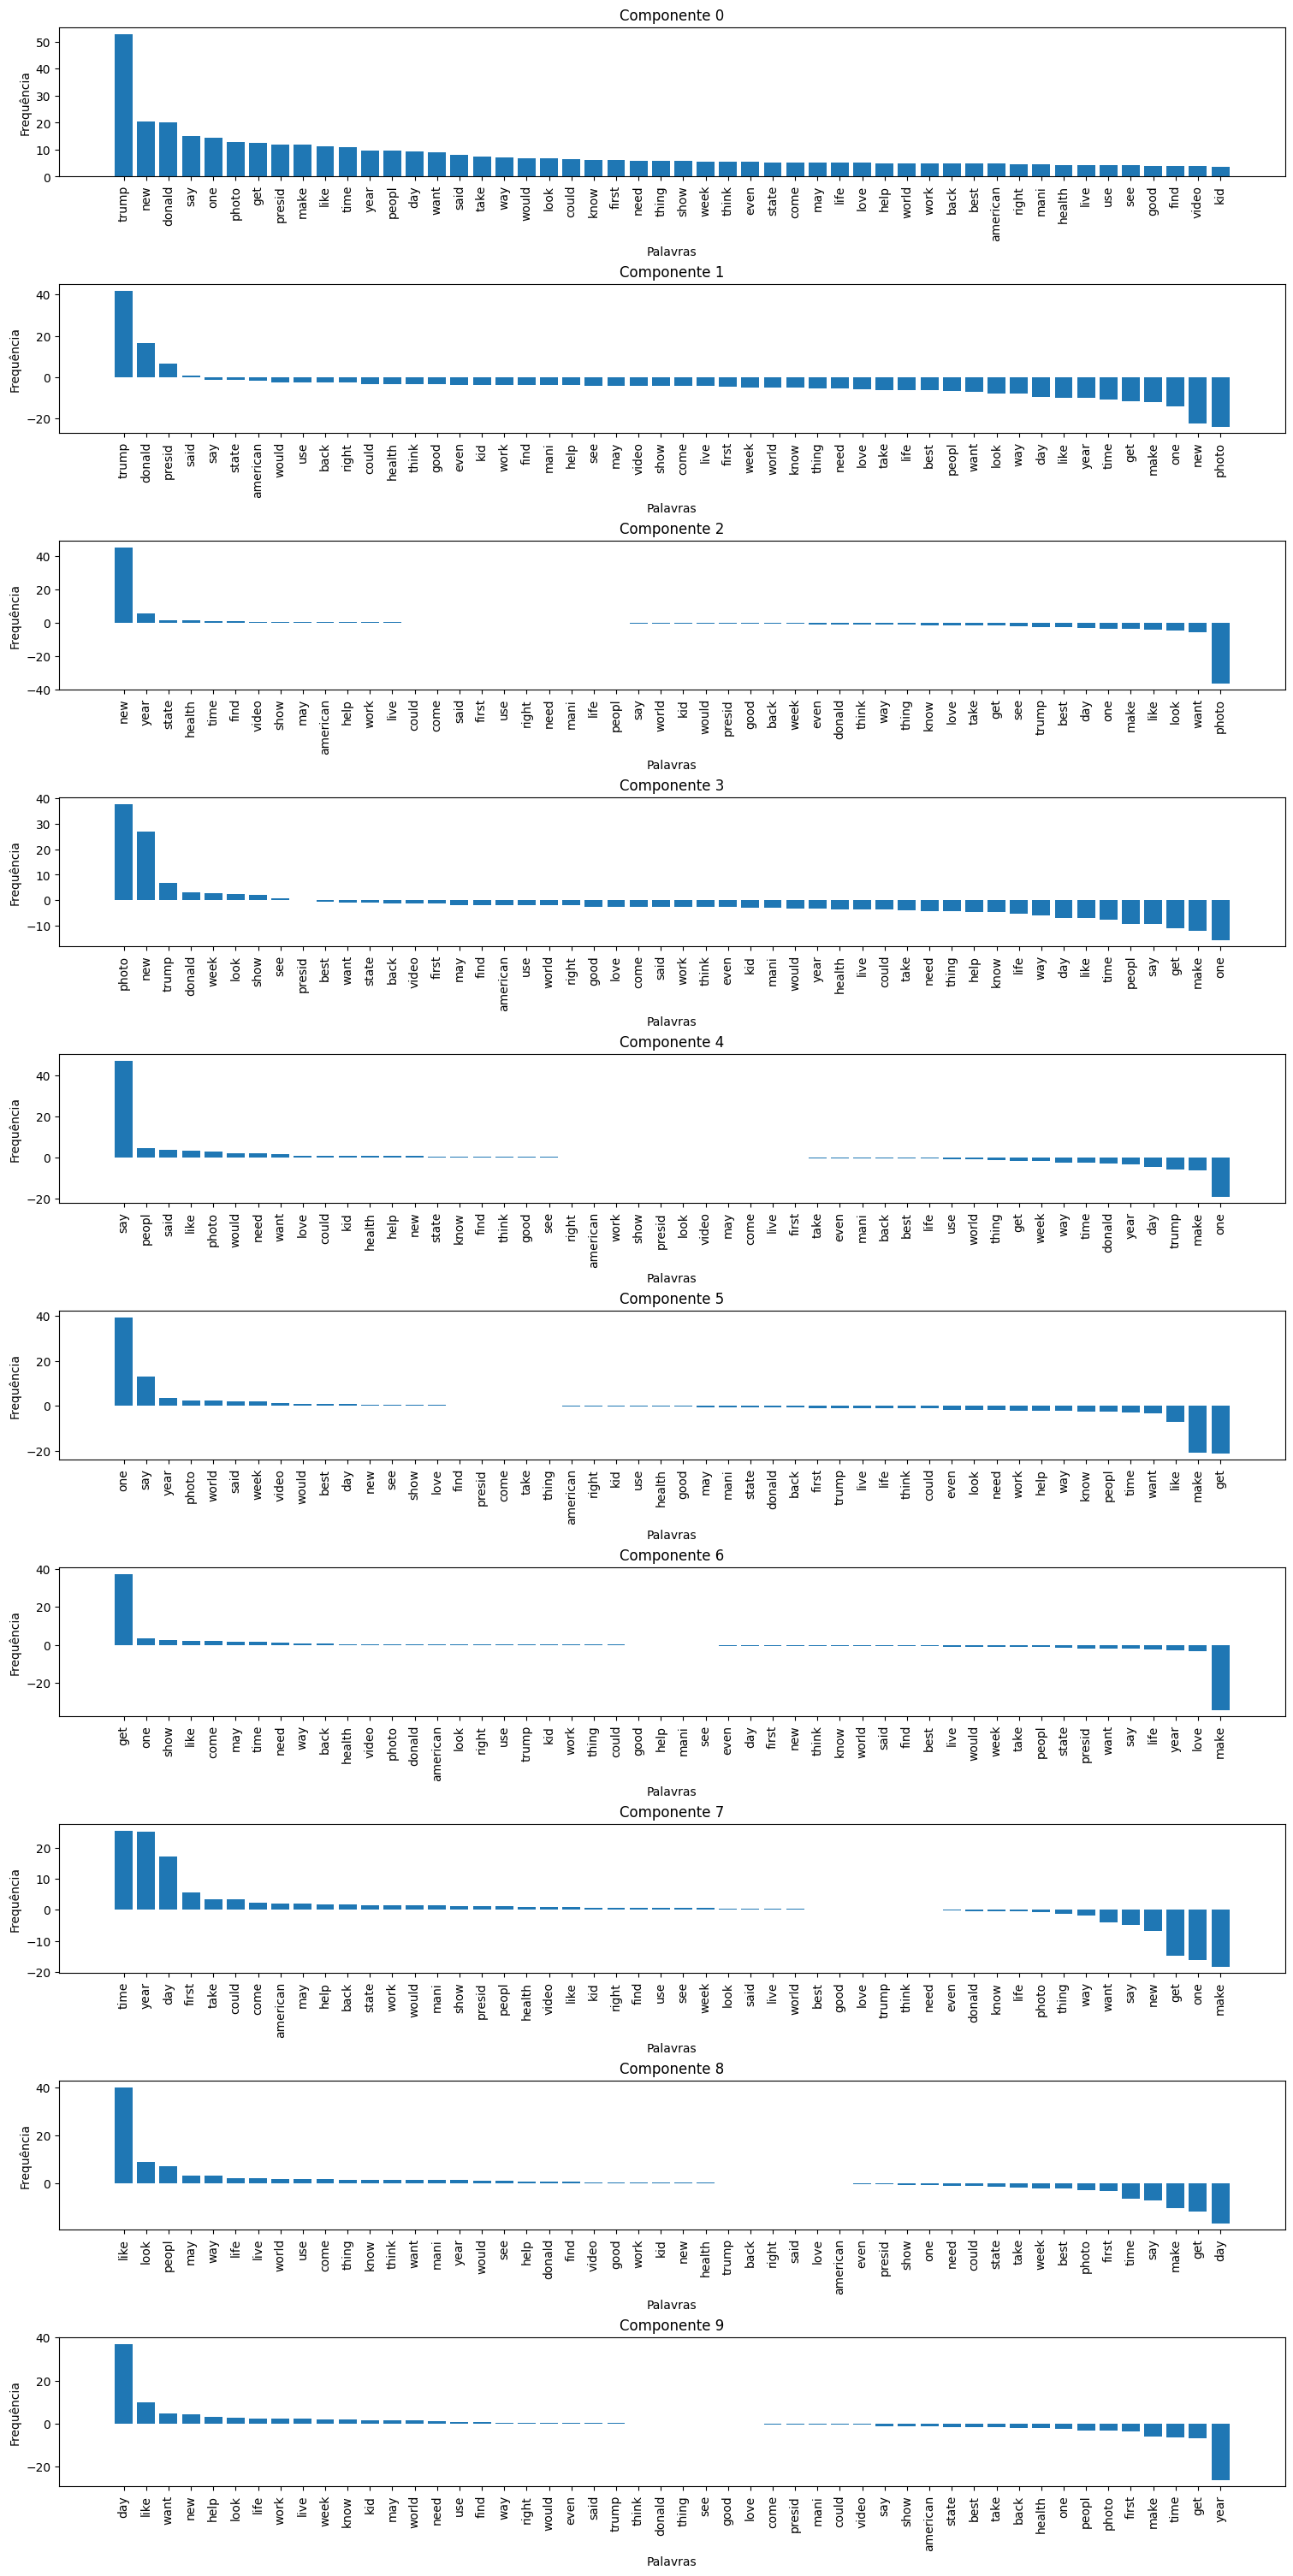

In [82]:
print(Ut[:, 0].shape)

plots_count = 10

fig, axs = plt.subplots(plots_count, 1, figsize=(15, 30), constrained_layout=True)

for i in range(plots_count):
    plot_word_frequencies(Ut[:, i], axs[i], f'Componente {i}')

plt.show()

## NMF

In [83]:
nmf = NMF(n_components=49)

In [84]:
Wt = nmf.fit_transform(frequency_matrix.T)
Ht = nmf.components_.T

In [85]:
np.shape(Wt)

(50, 49)

In [86]:
np.shape(Ht)

(115297, 49)

In [87]:
Wt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.59264966e-10, 4.10988053e-11, 3.37302716e-10]])

In [88]:
Ht[1, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.42732157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

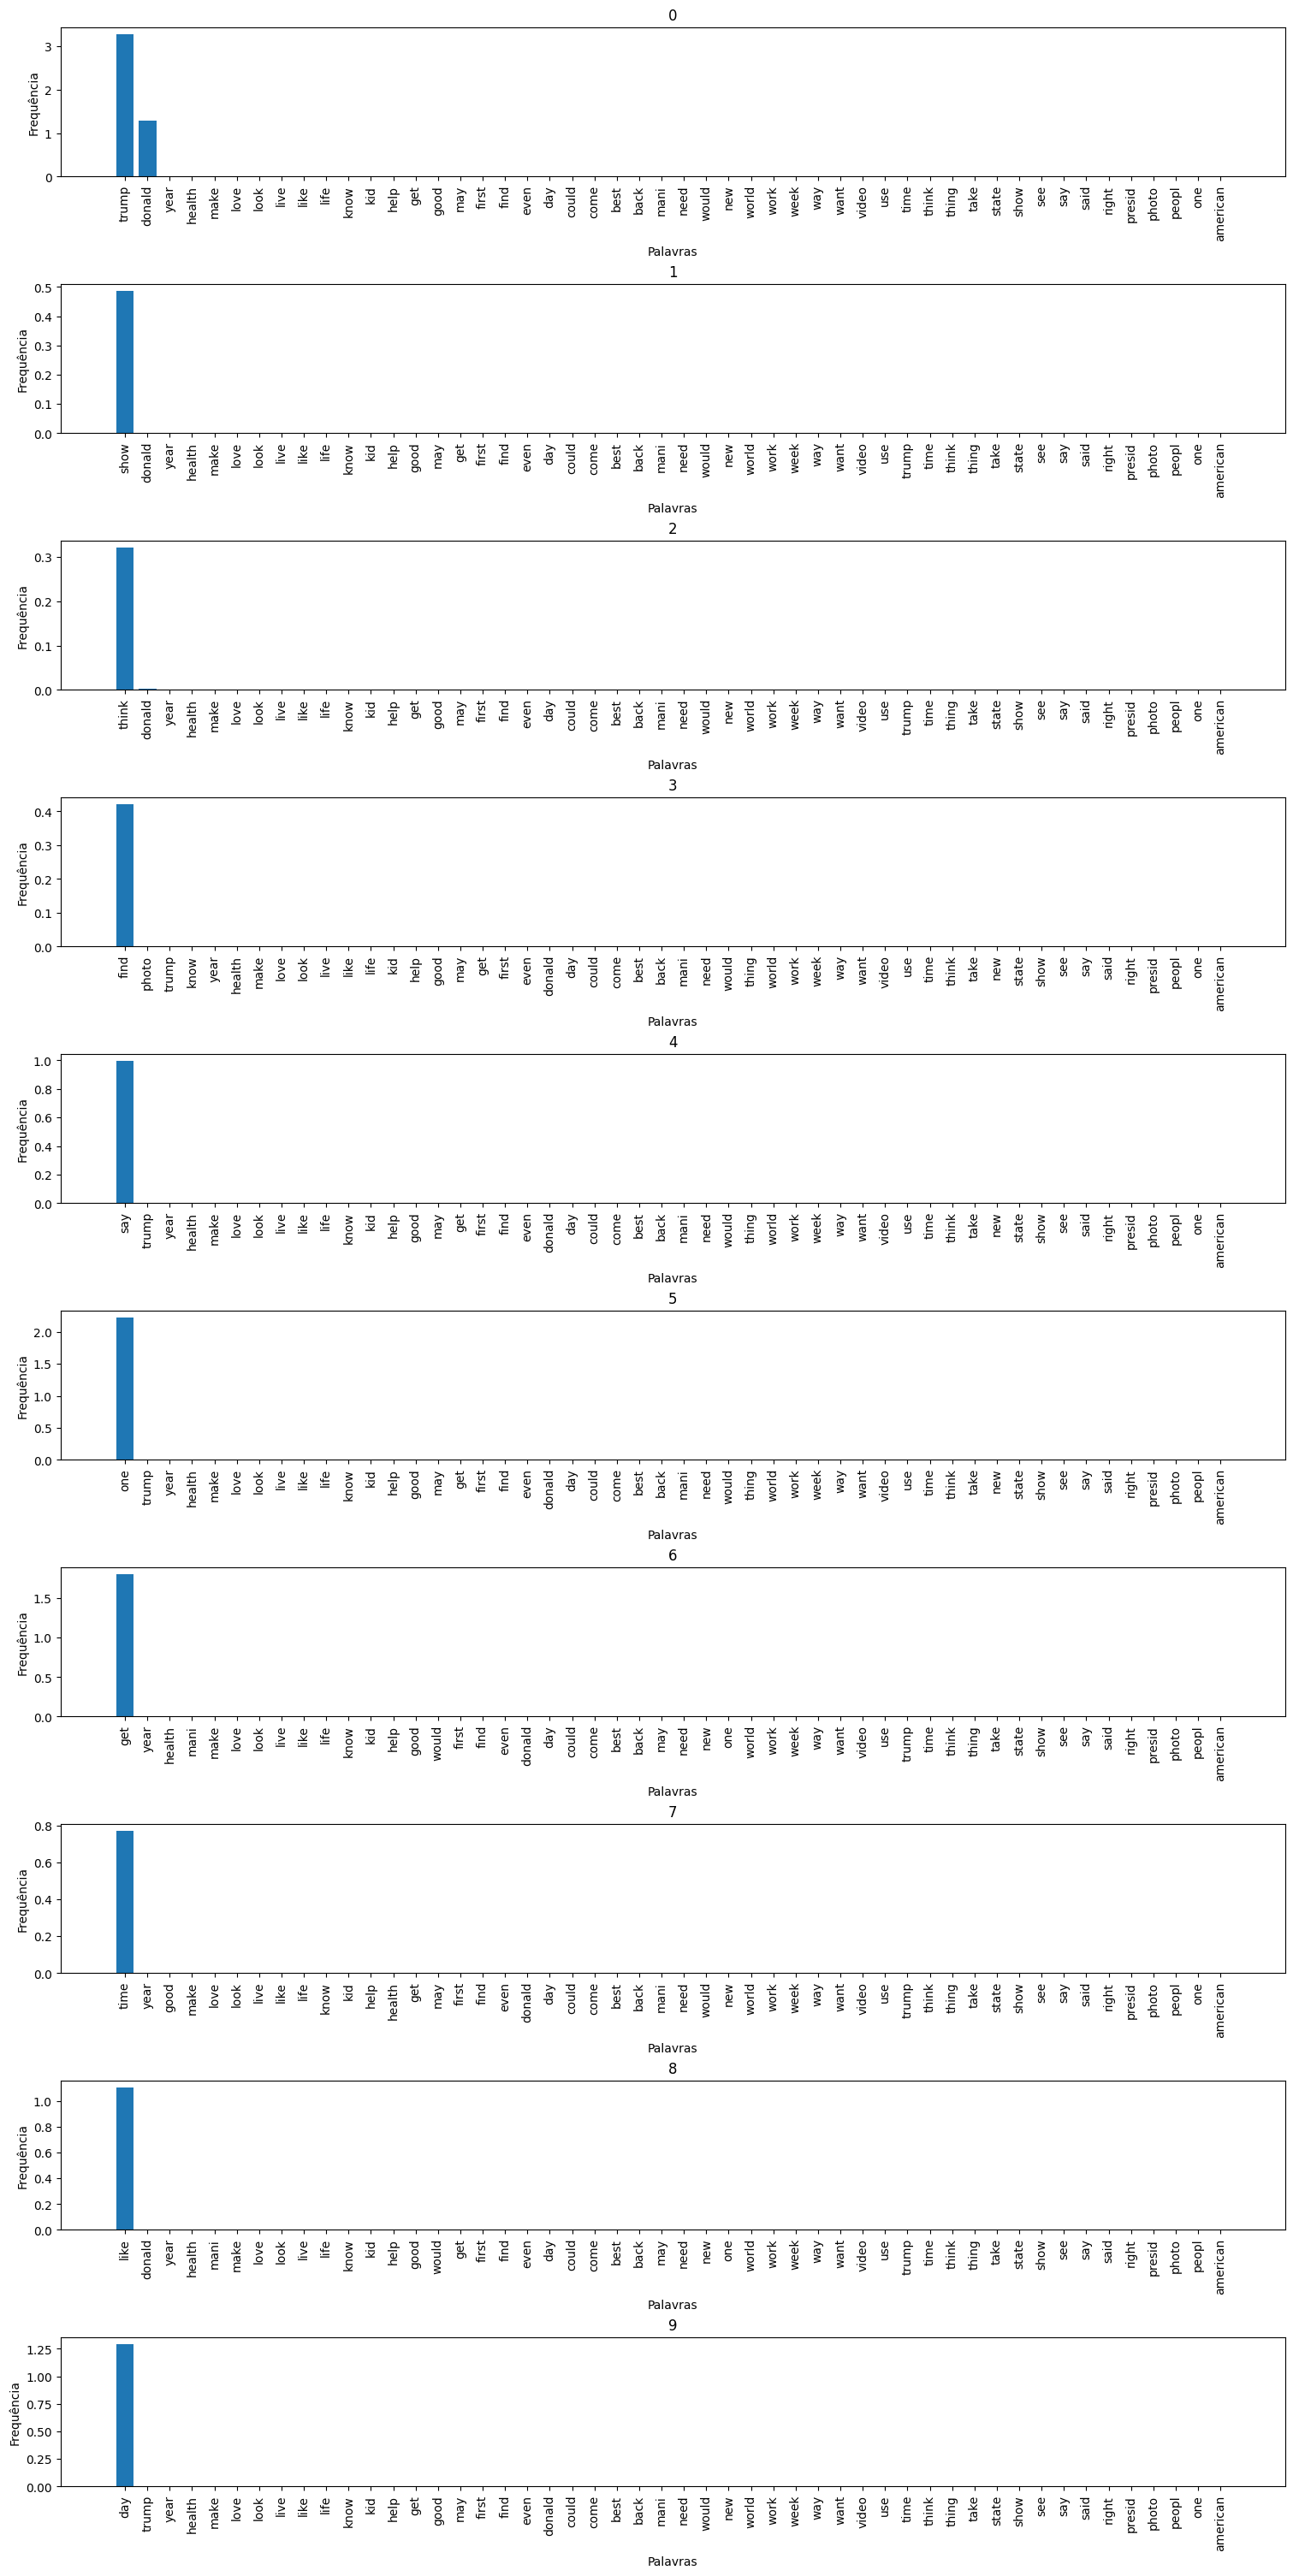

In [89]:
fig, axs = plt.subplots(plots_count, 1, figsize=(15, 30), constrained_layout=True)

for i in range(plots_count):
    plot_word_frequencies(Wt[:, i], axs[i], i)

plt.show()